<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [38]:
#Cargar librerias.
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [39]:
#Cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [40]:
#Revisar elementos distintos existentes.
df['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [5]:
#Corregir elementos escritos de distinta manera. 
df.loc[df['species']=='Setosa','species'] = 'setosa'
df.loc[df['species']=='SETOSA','species'] = 'setosa'
df.loc[df['species']==' virginica','species'] = 'virginica'
df.loc[df['species']=='virginica ','species'] = 'virginica'
df.loc[df['species']=='VIRGINICA','species'] = 'virginica'
df.loc[df['species']=='Versicolor','species'] = 'versicolor'
df.loc[df['species']=='VERSICOLOR','species'] = 'versicolor'
df.loc[df['species'].isnull(),'species'] = 'default'

df['species'].unique()#Mostrar la cantidad de elementos distintos deseados.

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [43]:
#Corregir elementos nan por el valor 0 en sepalLength.
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0#Cambiar nan por 0.
df['sepalLength'] = df['sepalLength'].astype(float)#Convertir elementos en tipo flotante.
sL=df['sepalLength'].unique()#Revisar elementos distintos con la corrección.
print("sL:")#Imprimir resultado.
sL

sL:


array([4.4, 7.2, 6.3, 6.7, 5.8, 6.2, 6.8, 6.9, 7.7, 6.4, 6.5, 7.6, 7.1,
       5.6, 7.9, 5.7, 7.4, 7.3, 5.9, 6. , 6.1, 4.9, 5.4, 8. , 5.2, 6.6,
       7. , 5.5, 5.1, 0. , 5. , 4.5, 4.6, 4.8, 4.7, 5.3])

In [44]:
#Corregir elementos nan por el valor 0 en sepalWidth.
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0#Corregir elementos nan por el valor 0.
df['sepalWidth'] = df['sepalWidth'].astype(float)#Convertir elementos en tipo flotante.
sW=df['sepalWidth'].unique()#Revisar elementos distintos con la corrección.
print("sW:")#Imprimir resultado.
sW

sW:


array([3.2, 3.6, 3.3, 3.4, 3.1, 2.8, 3. , 2.6, 3.8, 2.5, 2.7, 2.9, 2.2,
       5. , 2.3, 0. , 2.4, 2. , 3.5, 3.7, 3.9, 4.4, 4.9, 4.2, 4. , 4.1])

In [45]:
#Corregir elementos nan por el valor 0 en petalLength.
df.loc[df['petalLength'].isnull(),'petalLength'] = 0#Corregir elementos nan por el valor 0.
df['petalLength'] = df['petalLength'].astype(float)#Convertir elementos en tipo flotante.
pL=df['petalLength'].unique()#Revisar elementos distintos con la corrección.
print("pL:")#Imprimir resultado.
pL

pL:


array([1.3, 6.1, 6. , 5.7, 5.6, 5.1, 5.4, 5.2, 5.9, 5.3, 6.9, 5.8, 6.7,
       6.6, 5.5, 4.9, 6.4, 5. , 6.3, 4.8, 4.5, 4.7, 4.2, 8. , 4.6, 3.9,
       4.4, 4. , 3.6, 4.1, 4.3, 3. , 3.8, 3.3, 0. , 3.7, 3.5, 1.6, 1.7,
       1.5, 1.9, 1.4, 1. , 1.2, 1.1])

In [46]:
#Corregir elementos nan por el valor 0 en petalWidth.
df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0#Corregir elementos nan por el valor 0.
df['petalWidth'] = df['petalWidth'].astype(float)#Convertir elementos en tipo flotante.
pW=df['petalWidth'].unique()#Revisar elementos distintos con la corrección.
print("pW:")#Imprimir resultado.
pW

pW:


array([3. , 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.3, 1.2, 1.1, 1. , 0. , 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

Text(0, 0.5, 'Intervalos')

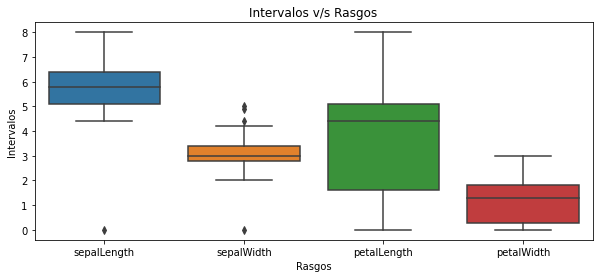

In [48]:
#Gráfico de box-plot.
df_LW = df.drop(['species'], axis=1)#Variables excluidas.
plt.figure(figsize=(10, 4))#Tamaño.
sns.boxplot(data=df_LW)#Gráfico de df_LW.
plt.title('Intervalos v/s Rasgos')#Título.
plt.xlabel('Rasgos')#Eje x.
plt.ylabel('Intervalos')#Eje y.

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [24]:
#Determinar con valores "True" o "False" si los valores se encuentran dentro del rango de valores rangos de valores.
mask_sl_inf=df['sepalLength']>=4.0
mask_sl_sup=df['sepalLength']<=7.0
mask_sw_inf=df['sepalWidth']>=2.0
mask_sw_sup=df['sepalWidth']<=4.5
mask_pl_inf=df['petalLength']>=1.0
mask_pl_sup=df['petalLength']<=7.0
mask_pw_inf=df['petalWidth']>=0.1
mask_pw_sup=df['petalWidth']<=2.5
mask_sl=mask_sl_inf & mask_sl_sup#Junta condición.
mask_sw=mask_sw_inf & mask_sw_sup#Junta condición.
mask_pl=mask_pl_inf & mask_pl_sup#Junta condición.
mask_pw=mask_pw_inf & mask_pw_sup#Junta condición.
#Crear columna o variables nueva label que determina si por fila se cumplen todas la condiciones.
df['label']=mask_sl & mask_sw & mask_pl & mask_pw
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


In [26]:
#Cambia los valores 'True' por 'válido' y 'False' por 'no válido'.
df.loc[df['label']==True,'label'] = 'válido'
df.loc[df['label']==False,'label'] = 'no válido'
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,no válido
1,7.2,3.6,6.1,2.5,virginica,no válido
2,6.3,3.3,6.0,2.5,virginica,válido
3,6.7,3.3,5.7,2.5,virginica,válido
4,6.3,3.4,5.6,2.4,virginica,válido


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

In [55]:
#Gráfico de sepalLength vs petalLength.
plt.figure(figsize=(10, 2))
sns.lmplot(x='petalLength',
           y='sepalLength', 
           data=df,
           fit_reg=False, 
           height=6,
           hue='label')
# usar Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

KeyError: ignored

<Figure size 720x144 with 0 Axes>

<Figure size 720x144 with 0 Axes>

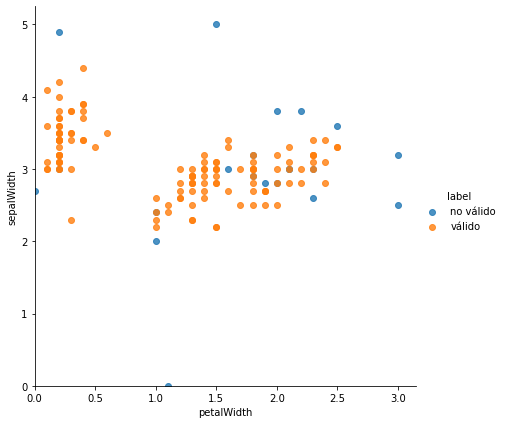

In [31]:
#Gráfico de sepalWidth vs petalWidth.
plt.figure(figsize=(10, 2))
sns.lmplot(x='petalWidth',
           y='sepalWidth', 
           data=df,
           fit_reg=False, 
           height=6,
           hue='label')
 
# usar Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [32]:
#Filtrado
iris_filtrado = df[mask_sl & mask_sw & mask_pl & mask_pw]
iris_filtrado.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
2,6.3,3.3,6.0,2.5,virginica,válido
3,6.7,3.3,5.7,2.5,virginica,válido
4,6.3,3.4,5.6,2.4,virginica,válido
5,6.7,3.1,5.6,2.4,virginica,válido
6,5.8,2.8,5.1,2.4,virginica,válido
